<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 

## Import dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

np.random.seed(812)

from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
X_train.shape

(404, 13)

- Normalize the data (all features should have roughly the same scale)
## Normalize

In [7]:
from sklearn.preprocessing import MinMaxScaler

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# # reshape the y vectors for scaling and use in the NN
y_train =np.reshape(y_train, (-1,1))
y_test =np.reshape(y_test, (-1,1))


In [10]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_X.fit(X))
X_train_scaled=scaler_X.transform(X_train)
X_test_scaled=scaler_X.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [11]:
print(scaler_y.fit(y))
y_train_scaled=scaler_y.transform(y_train)
y_test_scaled=scaler_y.transform(y_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [12]:
y_test.shape

(102, 1)

- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


- Compile your model

In [14]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model

- Fit your model and report its accuracy in terms of Mean Squared Error

In [15]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=0, validation_split=0.2)

- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


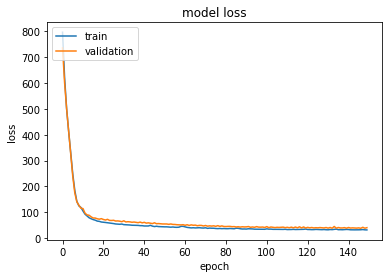

In [16]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss']) # this is MSE
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- Run this same data through a linear regression model. Which achieves higher accuracy?
The linear regression has lower error.

In [18]:
import pandas as pd  
import seaborn as sns 

%matplotlib inline

X_train[:4]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00]])

In [21]:
from sklearn.datasets import load_boston
boston_dataset_object = load_boston()
boston_dataset_df = pd.DataFrame(boston_dataset_object.data, columns=boston_dataset_object.feature_names)
boston_dataset_df['MEDV'] = boston_dataset_object.target
features = boston_dataset_object['feature_names']
features
dir(boston_dataset_object)
boston_dataset_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [23]:
from sklearn.model_selection import train_test_split

features = list(boston_dataset_object.feature_names)
target = 'MEDV'

X_lin = boston_dataset_df[features]
y_lin = boston_dataset_df[target]

# Split data into train and test
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size = 0.3, random_state=5)

# Split test into test and val
X_lin_test, X_lin_val, y_lin_test, y_lin_val  = train_test_split(X_lin_test, y_lin_test, test_size = 0.5, random_state=5)

In [ ]:
# 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_lin_train, y_lin_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# model evaluation for training set
# Based heavily on: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

y_lin_train_predict = lin_model.predict(X_lin_train)

rmse = (np.sqrt(mean_squared_error(y_lin_train, y_lin_train_predict)))
r2 = r2_score(y_lin_train, y_lin_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_lin_test_predict = lin_model.predict(X_lin_test)
rmse = (np.sqrt(mean_squared_error(y_lin_test, y_lin_test_predict)))
r2 = r2_score(y_lin_test, y_lin_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.366731254717563
R2 score is 0.7611598772034452


The model performance for testing set
--------------------------------------
RMSE is 5.6386847318547435
R2 score is 0.6792275200820439


- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

https://paperswithcode.com/sota

https://datascienceplus.com/keras-regression-based-neural-networks/

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.

**From:** https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

**Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.**

In [26]:
from tensorflow.keras.datasets import fashion_mnist

(X_MF_train, y_mf_train), (X_MF_test, y_mf_test) = fashion_mnist.load_data()

In [27]:
# Reshape the data
X_MF_train.shape
# Reshape the data
X_MF_train = X_MF_train.reshape(60000, 784)
X_MF_test = X_MF_test.reshape(10000, 784)

# X Variable Types
X_MF_train = X_MF_train.astype('float32')
X_MF_test = X_MF_test.astype('float32')

In [29]:
from tensorflow.keras.utils import to_categorical

num_classes = 10

# y_mf_train = to_categorical(y_mf_train, num_classes)
# y_mf_test = to_categorical(y_mf_test, num_classes)

y_mf_test.shape
# 
# X_MF_test.shape

(10000, 10)

In [30]:
mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax')) # ten fashion categories, so ten output nodes

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [34]:
mnist_model.fit(X_MF_train, y_mf_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 258us/sample - loss: 1.4574 - accuracy: 0.4643
Epoch 2/5
60000/60000 [==============================] - 14s 237us/sample - loss: 1.0090 - accuracy: 0.5685
Epoch 3/5
60000/60000 [==============================] - 15s 255us/sample - loss: 0.7396 - accuracy: 0.7070
Epoch 4/5
60000/60000 [==============================] - 15s 254us/sample - loss: 0.6801 - accuracy: 0.7247
Epoch 5/5
60000/60000 [==============================] - 16s 271us/sample - loss: 0.6675 - accuracy: 0.7261


In [35]:
# evaluate the model
scores = mnist_model.evaluate(X_MF_test, y_mf_test)
print(f"{mnist_model.metrics_names[1]}: {scores[1]*100}")

10000/10000 [==============================] - 2s 150us/sample - loss: 0.6772 - accuracy: 0.7294
accuracy: 72.93999791145325


-
-
-
-
-
-




- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 


dict_keys(['loss', 'accuracy'])


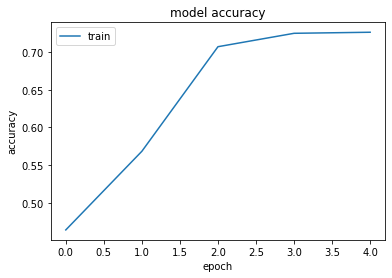

In [42]:
hist = mnist_model.history
print(hist.history.keys())
# "Loss"
# plt.plot(hist.history['loss']) # this is MSE
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.